<a href="https://colab.research.google.com/github/BoWarburton/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4-clustering/LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

# raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()
df.diagnosis.value_counts()

(569, 33)


B    357
M    212
Name: diagnosis, dtype: int64

## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [98]:
df = df.drop('diagnosis', axis=1)
df.head()

id  radius_mean  ...  fractal_dimension_worst  Unnamed: 32
0    842302        17.99  ...                  0.11890          NaN
1    842517        20.57  ...                  0.08902          NaN
2  84300903        19.69  ...                  0.08758          NaN
3  84348301        11.42  ...                  0.17300          NaN
4  84358402        20.29  ...                  0.07678          NaN

[5 rows x 32 columns]

In [0]:
df = df.drop('id', axis=1)

In [100]:
df.isna().head()

radius_mean  texture_mean  ...  fractal_dimension_worst  Unnamed: 32
0        False         False  ...                    False         True
1        False         False  ...                    False         True
2        False         False  ...                    False         True
3        False         False  ...                    False         True
4        False         False  ...                    False         True

[5 rows x 31 columns]

In [101]:
df.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [102]:
df.isnull().sum()

radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: int64

In [0]:
df = df.dropna(how='all', axis='columns')

In [104]:
df.head()

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]

## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


### Try to find good columns

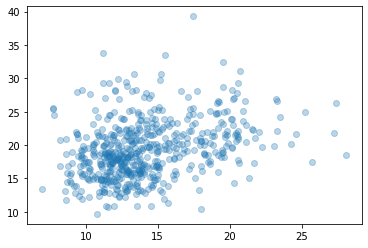

In [105]:
plt.scatter(df['radius_mean'], df['texture_mean'], alpha=.3)
# plt.scatter(df['radius_mean'], df['texture_mean'], color=df['diagnosis'])

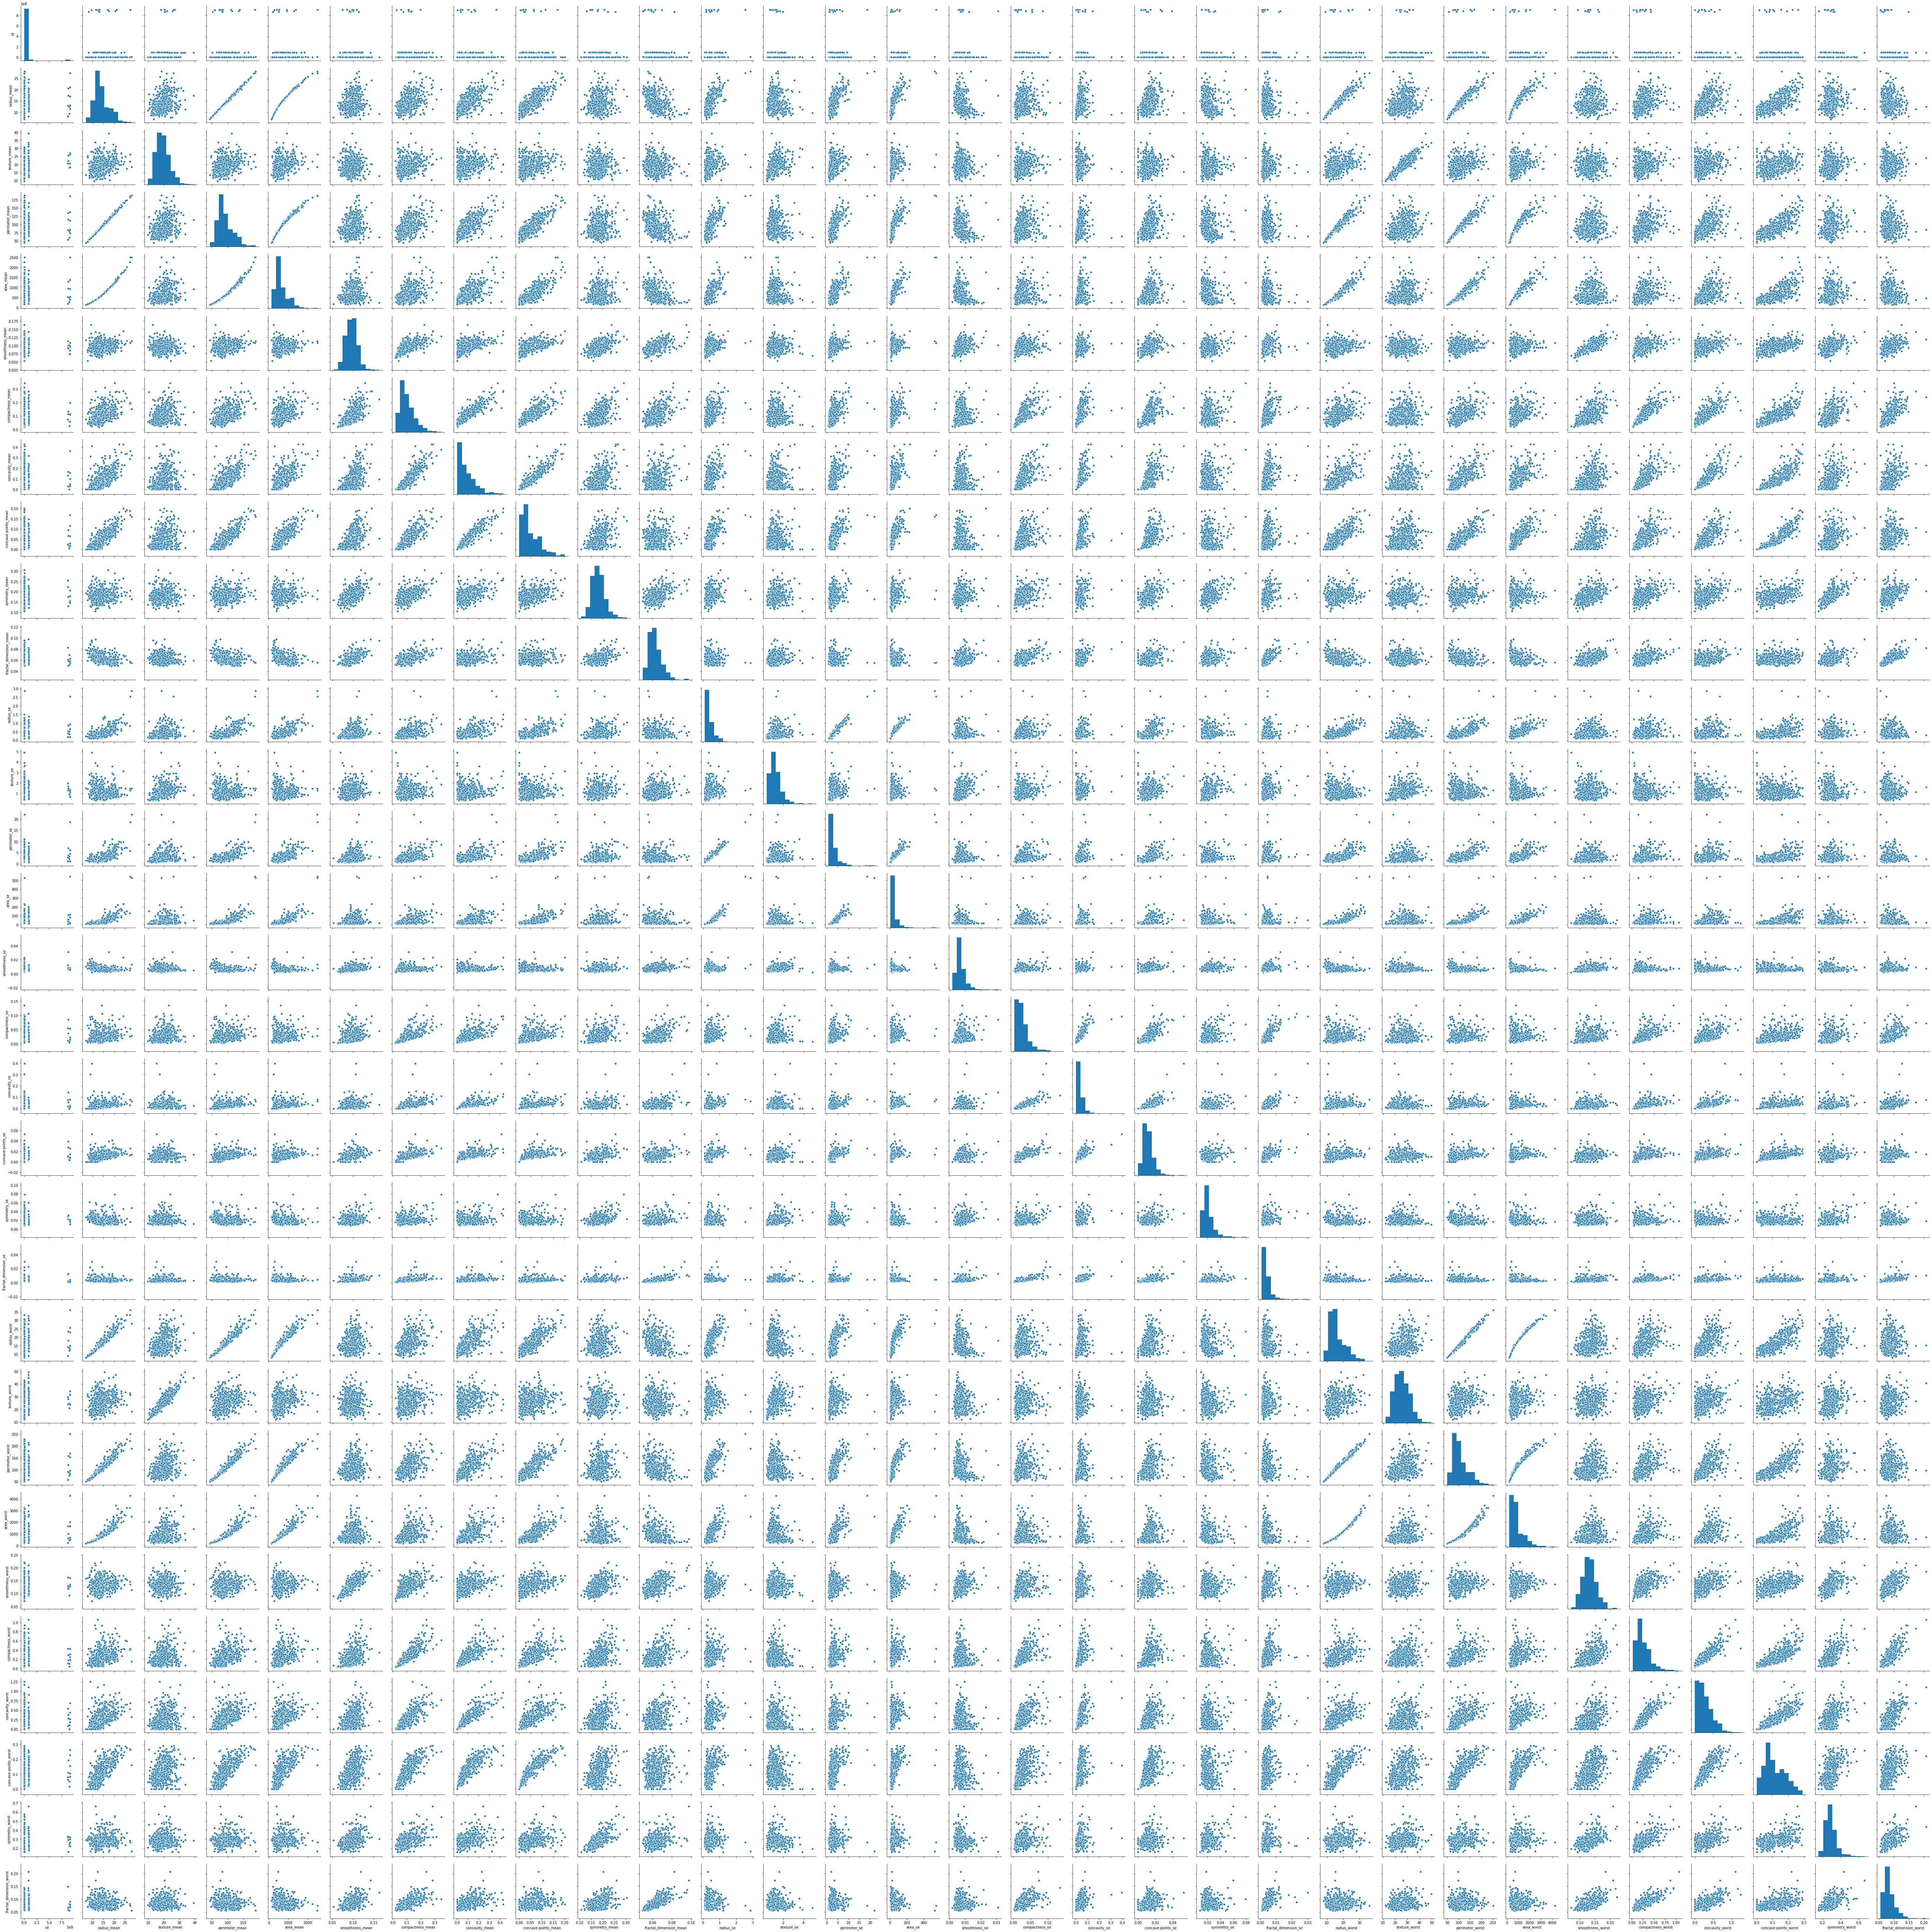

In [44]:
import seaborn as sns
sns.pairplot(data=df)

Forget it. Just use all columns.

### Elbow method suggests using 2 clusters

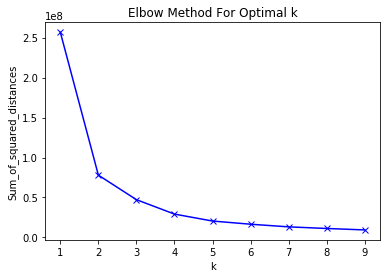

In [106]:
sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    sum_of_squared_distances.append(km.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### K-Means clustering

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from scipy.spatial import distance


In [108]:
KMeans(n_clusters=2, verbose=1).fit(df)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 82626898.05927433
start iteration
done sorting
end inner loop
Iteration 1, inertia 78399579.34115468
start iteration
done sorting
end inner loop
Iteration 2, inertia 77943099.87829883
start iteration
done sorting
end inner loop
Iteration 3, inertia 77943099.87829883
center shift 0.000000e+00 within tolerance 1.503675e+00
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 89115520.0661165
start iteration
done sorting
end inner loop
Iteration 1, inertia 81123947.04201122
start iteration
done sorting
end inner loop
Iteration 2, inertia 79162241.48018475
start iteration
done sorting
end inner loop
Iteration 3, inertia 78347868.29532588
start iteration
done sorting
end inner loop
Iteration 4, inertia 78118051.46186261
start iteration
done sorting
end inner loop
Iteration 5, inertia 77974622.18812649
start iteration
done sorting
end inner loop
Iteration 6, inertia 77

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [116]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)
labels = kmeans.labels_
print('how many labels:', len(labels))
print('df rows, cols', df.shape)
# print(labels)

how many labels: 569
df rows, cols (569, 30)


In [0]:
new_series = pd.Series(labels)
df['clusters'] = new_series.values

df.head(20)

In [123]:
accuracy_df = pd.DataFrame({'diagnosis': df_original['diagnosis'], 'label': kmeans.labels_})
accuracy_df.head()
accuracy_df.shape

(569, 2)

In [125]:
accuracy_df.head()

diagnosis  label
0         M      1
1         M      1
2         M      1
3         M      0
4         M      1

In [119]:
accuracy_df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [127]:
accuracy_df.label.value_counts()

0    438
1    131
Name: label, dtype: int64

In [128]:
accuracy_df['diagnosis'].replace({'B': 0, 'M': 1})

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [0]:
# Percentage accuracy
(accuracy_df['diagnosis'] == accuracy_df['label']).value_counts()[1]/len(accuracy_df)

## Check your work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [55]:
df_original = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df_original.shape)

(569, 33)


In [93]:
print('Original diagnosis:\n', df_original.diagnosis.value_counts())
print('My clusters:\n', df.)

Original diagnosis:
 B    357
M    212
Name: diagnosis, dtype: int64


# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [131]:
# Standardize our data
# scikitlearn workflow: import, instantiate, use
# instantiate:
scaler = StandardScaler()
# use StandardScaler
Z = scaler.fit_transform(df)
Z[0]

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

In [0]:
# Retain all of our columns with PCA
pca = PCA()
transformed_data = pca.fit_transform(Z)

In [137]:
len(transformed_data.T)

30

In [0]:
# Define scree plot function
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

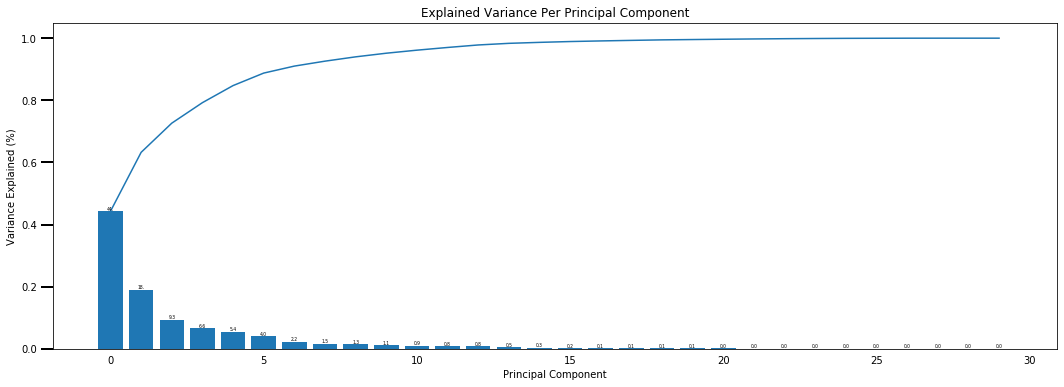

In [134]:
scree_plot(pca)

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

## > Gained about 6%

## Scatter plot of PC1 vs PC2

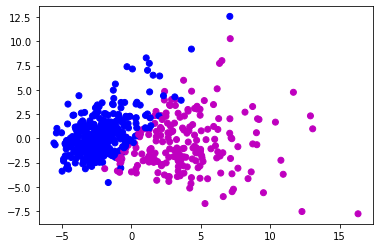

In [140]:
plt.scatter(transformed_data[:,0:1], transformed_data[:,1:2], color=df_original['diagnosis']);

In [141]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(transformed_data)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 1 

In [142]:
accuracy_df = pd.DataFrame({'diagnosis': df_original['diagnosis'], 'label': kmeans.labels_})
accuracy_df.head()

diagnosis  label
0         M      1
1         M      1
2         M      1
3         M      1
4         M      1

In [0]:
accuracy_df['diagnosis'] = accuracy_df['diagnosis'].replace({'B':0, 'M':1})

In [144]:
(accuracy_df['diagnosis'] == accuracy_df['label']).value_counts()[1]/len(accuracy_df)

0.9103690685413005

In [0]:
df_benign = df[df['label'] == 0]
df_benign.describe()
df_malignant = df[df['labels'] == 1]

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project

In [0]:
# Working on data storytelling project
# "https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
df_dcf = pd.read_csv('https://raw.githubusercontent.com/BoWarburton/data/master/dcf.csv')

In [152]:
df_dcf.head()

Data_as_of DCF Region  ... INDEPENDENT_LIVING Demographic_Type
0  08/06/2015      Other  ...                  0             Race
1  08/06/2015      Other  ...                  0             Race
2  08/06/2015      Other  ...                  0             Race
3  08/06/2015      Other  ...                  0             Race
4  08/06/2015   Region 1  ...                  0             Race

[5 rows x 20 columns]